# Data Wrangling Phases

## 1 - Gather data

## 2 - Assess data

## 3 - Clean data



In [2]:
#importing required libraries and packages

import pandas as pd
import numpy as np
import requests

import time
import matplotlib.pyplot as plt
import seaborn as sns

import json
import tweepy
import re


## 1 Gather


In [3]:
#Access twitter archive file just to have alook

df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#downloading image predicton file programatically from udacity server

response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)



In [5]:
df_image = pd.read_csv('image-predictions.tsv' , sep = '\t')  #access and analyz this file

In [6]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#entering secret keys and tokens to access twitter api
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth , wait_on_rate_limit=True, wait_on_rate_limit_notify=True) 
#including handling parameters for timeouts

In [ ]:
# Testing functionality
tweet = api.get_status(892177421306343426, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
tweet

Rate limit reached. Sleeping for: 605


In [10]:

# Get json info
info = tweet._json
info

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boop… https://t.co/aQFSeaCu9L",
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/aQFSeaCu9L',
    'expanded_url': 'https://twitter.com/i/web/status/892177421306343426',
    'display_url': 'twitter.com/i/web/status/8…',
    'indices': [117, 140]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 4196983835,
  'id_str': '4196983835',
  'name': 'WeRateDogs®',
  'screen_name': 'dog_rates',
  'location': 'links and things ➜',
  'description': 'Your Only Source For 

In [31]:
# getting tweets retweets and likes counts 
info['favorite_count']   ,   info['retweet_count'] 

(30364, 5495)

In [32]:
# list of tweet ids from archive tweets csv dataframe
df_tweet_ids = df_archive['tweet_id']


In [ ]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

start = time.time() 



# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)




In [ ]:
# total tweets received without any error
print("The lengh of the result", len(df_tweets))

# The tweet_id for tweets with errors
print("The lengh of the errors", len(tweets_error_list))

In [ ]:

# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [7]:
# Read the saved tweet_json.txt file into a dataframe
df_tweetsdata = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [8]:
df_tweetsdata.head()

,tweet_id,favorites,retweets,user_favourites,date_time
0,892420643555336193,35072,7376,145807,2017-08-01 16:23:56
1,892177421306343426,30366,5495,145807,2017-08-01 00:17:27
2,891815181378084864,22828,3633,145807,2017-07-31 00:18:03
3,891689557279858688,38351,7554,145807,2017-07-30 15:58:51
4,891327558926688256,36629,8140,145807,2017-07-29 16:00:24


In [9]:
df_tweetsdata.tail()

,tweet_id,favorites,retweets,user_favourites,date_time
2326,666049248165822465,94,38,145807,2015-11-16 00:24:50
2327,666044226329800704,260,122,145807,2015-11-16 00:04:52
2328,666033412701032449,107,39,145807,2015-11-15 23:21:54
2329,666029285002620928,118,41,145807,2015-11-15 23:05:30
2330,666020888022790149,2343,444,145807,2015-11-15 22:32:08


In [10]:
df_tweetsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


## END : GATHER DATA
The 3 dataframes are:-
df_archive - contains data read from provided csv
df_image - contains data from tsv file downloaded from udacity server
df_tweetsdata - contains data after authenticating the twitter api by using tweepy library  

## 2. Assess - Data assessment

### Assess df_archive dataframe

In [11]:
#Assesing first dataframe  provided with info method for null or missing values

df_archive.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#checking null values for all columns
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
#duplicate values check
df_archive.duplicated().value_counts()  #no duplicates which is great

False    2356
dtype: int64

In [14]:
df_archive.dtypes  

# timestamp and retweeted_status_timestamp should be datetime datatype

# in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float



tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [15]:
(df_archive['name'].str.len()<= 1).value_counts() #checking dog names with just 1 letter to remove absurd data

False    2300
True       56
Name: name, dtype: int64

In [58]:
df_archive['rating_numerator'].describe()   ,   df_archive['rating_denominator'].describe()

(count    2356.000000
 mean       13.126486
 std        45.876648
 min         0.000000
 25%        10.000000
 50%        11.000000
 75%        12.000000
 max      1776.000000
 Name: rating_numerator, dtype: float64, count    2356.000000
 mean       10.455433
 std         6.745237
 min         0.000000
 25%        10.000000
 50%        10.000000
 75%        10.000000
 max       170.000000
 Name: rating_denominator, dtype: float64)

In [59]:
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Assess df_image dataframe

In [12]:
df_image.info()   #images dataframe analysis and great it seems no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [60]:
df_image.isnull().sum()   #it seems no null values great

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [61]:
df_image.duplicated().value_counts()   #no duplicates in this df

False    2075
dtype: int64

### Assess df_tweetsdata dataframe

In [62]:
df_tweetsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


In [63]:
df_tweetsdata.describe()

,tweet_id,favorites,retweets,user_favourites
count,2.331000e+03,2331.000000,2331.000000,2331.000000
mean,7.419079e+17,7324.291291,2593.960532,145807.012441
std,6.823170e+16,11375.552911,4388.053648,0.110867
min,6.660209e+17,0.000000,1.000000,145807.000000
25%,6.782670e+17,1270.000000,526.000000,145807.000000
50%,7.182469e+17,3179.000000,1210.000000,145807.000000
75%,7.986692e+17,8953.000000,3004.000000,145807.000000
max,8.924206e+17,150820.000000,74453.000000,145808.000000


In [64]:
df_tweetsdata.isnull().sum()   #no null values identified

tweet_id           0
favorites          0
retweets           0
user_favourites    0
date_time          0
dtype: int64

In [65]:
df_tweetsdata.duplicated().value_counts()   #no duplicates identified

False    2331
dtype: int64

## Issues found after Assessment:-



### Quality Issues - 

#### df_archive  dataframe

1.  Remove columns with missing data no longer needed missing data :-         retweeted_status_id ,retweeted_status_user_id ,           retweeted_status_timestamp , in_reply_to_status_id,in_reply_to_user_id  
2. timestamp should be datetime datatype

3. Clean the content of source column, make it more readable.

4. Nan and Null values for all columns removal

5. Fix Dogs name with  single character or null values 

####  df_tweetsdata dataframe


6. datetime should be of datatime datatype instead of string 

7. user_favourites value is same for all rows and we can delete this column or keep it but its of no use

8. p1, p2 and p3 should be categoral datatype
 


### Tidiness Issues - 


#### df_archive  dataframe

1. Combine dog stages into one column

#### df_image dataframe

2. p1_conf, p2_conf and p3_conf and p1_dog,p2_dog,p3_dog columns merged for ,meaningful insights and df_image should only have jpg_url and tweet_id, breed and image no info from p1,p2,p3 columns 

#### All clean dataframes should be merged into one in the last
3. df_archive_clean df should be joined to df_image_clean  and df_tweetsdata_clean





## 3. Clean Data using template  Define, Code, Test

### Define
Qual 1) Remove columns with missing data no longer needed :- retweeted_status_id ,retweeted_status_user_id , retweeted_status_timestamp , in_reply_to_status_id,in_reply_to_user_id
since these 

### Code

In [16]:
# drop retweet and reply status not analysis worthy columns


df_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [17]:
# drop retweet and reply status not analysis worthy columns

df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Define
Qual 2) timestamp should be datetime datatype


### Code

In [18]:
# change column dfatatype


df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'], format='%Y-%m-%d %H:%M:%S')



### Test

In [19]:
#check all columns again 
df_archive.timestamp.describe()

count                    2356
unique                   2356
top       2016-09-12 15:10:21
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

### Define
Qual 3) Clean the content of source column, make it more readable.

### Code

In [20]:
# cleaning source column so that more meaningful data can be extracted

df_archive['source'] = df_archive['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])




### Test

In [21]:
#check all columns again 
df_archive.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Define
Qual 4) Missing counts fix for doggo, floofer, pupper and puppo in archive table

### Code

In [22]:

# Make copies to preserve the original datasets
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweetsdata_clean = df_tweetsdata.copy()

In [23]:
dog_types = list(df_archive_clean.iloc[:,-4:])
dog_types

['doggo', 'floofer', 'pupper', 'puppo']

In [24]:
def find_dog_type(df, dog_type):
    dog_list = []
    for row in df['text']:
        if dog_type in row:
            dog_list.append(dog_type)
        else:
            dog_list.append(np.NaN)
    return dog_list

In [25]:
for dog_type in dog_types:
    df_archive_clean[dog_type] = find_dog_type(df_archive, dog_type)

### Test

In [26]:
#check all columns again 
df_archive_clean[dog_types].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
doggo      98 non-null object
floofer    4 non-null object
pupper     272 non-null object
puppo      37 non-null object
dtypes: object(4)
memory usage: 73.7+ KB


In [27]:

# Compare to counts from text
for dog_type in dog_types:
    print(dog_type, df_archive_clean.text.str.contains(dog_type).sum())

doggo 98
floofer 4
pupper 272
puppo 37


### Define
Qual 5)Fix Dogs name with single character or null values

### Code

In [28]:
# fix absurd and short adjectives confused as name as well as None names




words = df_archive[df_archive.name.str.islower()].name.unique()


df_archive_clean['name'] = df_archive_clean['name'].replace(words, np.nan)
df_archive_clean['name'] = df_archive_clean['name'].replace('None', np.nan)



In [29]:
df_archive_clean['name'].dropna()

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Canela
20          Gerald
21         Jeffrey
23          Canela
26            Maya
27          Mingus
28           Derek
29          Roscoe
31         Waffles
33           Jimbo
34          Maisey
36           Lilly
38            Earl
39            Lola
           ...    
2268          Dook
2270          Hall
2271      Philippe
2274         Reese
2275       Cupcake
2279         Biden
2280          Fwed
2282     Genevieve
2283        Joshwa
2286       Timison
2289      Clarence
2290       Kenneth
2291       Churlie
2292       Bradlay
2293         Pipsy
2295          Gabe
2296         Clybe
2297          Dave
2300          Keet
2302        Klevin
2303         Carll
2308        

### Test

In [30]:
#check all columns again 
df_archive_clean.name.value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
Toby           7
Buddy          7
Daisy          7
Bailey         7
Oscar          6
Stanley        6
Leo            6
Jack           6
Jax            6
Scout          6
Bella          6
Koda           6
Rusty          6
Dave           6
Milo           6
Finn           5
George         5
Gus            5
Alfie          5
Sunny          5
              ..
Edmund         1
Naphaniel      1
Lilah          1
Josep          1
Kollin         1
Goliath        1
Comet          1
Christoper     1
Monty          1
Superpup       1
Rhino          1
Hanz           1
Tessa          1
Freddery       1
Mitch          1
Jaycob         1
Joey           1
Socks          1
Harry          1
Miguel         1
Finnegus       1
Suki           1
Kara           1
Ralphé         1
Stewie         1
Major          1
Durg           1
Bodie         

In [31]:
df_archive_clean['name'].describe()

count        1502
unique        931
top       Charlie
freq           12
Name: name, dtype: object

### Define
Qual 6) date_time should be of datatime datatype instead of string

### Code

In [32]:
# drop retweet and reply status not analysis worthy columns

df_tweetsdata_clean['date_time'] = pd.to_datetime(df_tweetsdata_clean['date_time'], format='%Y-%m-%d %H:%M:%S')



### Test

In [33]:
#check all columns again 
df_tweetsdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 91.1 KB


### Define
Qual  7)user_favourites value is same for all rows and we can delete this column or keep it but its of no use

### Code

In [34]:
# drop retweet and reply status not analysis worthy columns


df_tweetsdata_clean.drop(['user_favourites'], axis=1, inplace=True)

### Test

In [35]:
#check all columns again 
df_tweetsdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null int64
retweets     2331 non-null int64
date_time    2331 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 72.9 KB


### Define
Qual 8) p1, p2 and p3 should be categoral datatype

### Code

In [37]:
# convert to category datatype

df_image_clean['p1'] = df_image_clean['p1'].astype('category')
df_image_clean['p2'] = df_image_clean['p2'].astype('category')
df_image_clean['p3'] = df_image_clean['p3'].astype('category')

#p1_conf, p2_conf and p3_conf columns should be merged
#p1_dog, p2_dog and p3_dog columns should be merged


### Test

In [38]:
#check all columns again 
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


### Define
Tidy 1)Combine dog stages into one column life_stage


### Code

In [39]:
# melt columns and merge into one stages column


melt_coumns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df_archive_clean.columns.tolist() if x not in melt_coumns]

# Melt the the columns into values
df_archive_clean = pd.melt(df_archive_clean, id_vars = stay_columns, value_vars = melt_coumns, 
                         var_name = 'stages', value_name = 'life_stage')



In [40]:
# Delete column 'stages'
df_archive_clean = df_archive_clean.drop('stages', 1)

### Test

In [41]:
#check all columns again 
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 9 columns):
tweet_id              9424 non-null int64
timestamp             9424 non-null datetime64[ns]
source                9424 non-null object
text                  9424 non-null object
expanded_urls         9188 non-null object
rating_numerator      9424 non-null int64
rating_denominator    9424 non-null int64
name                  6008 non-null object
life_stage            411 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 662.7+ KB


In [42]:
df_archive_clean.life_stage.value_counts()

pupper     272
doggo       98
puppo       37
floofer      4
Name: life_stage, dtype: int64

## Define
Tidy 2)Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements


### Code

In [43]:
#image sample

df_image_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,Irish_terrier,0.1537,True,Rhodesian_ridgeback,0.068457,True


In [44]:
df_image_clean['pred_breed'] = [df['p1'] if df['p1_dog'] == True and df['p1_conf'] > 0.2 
                     else df['p2'] if df['p2_dog'] == True and df['p2_conf'] > 0.2
                     else df['p3'] if df['p3_dog'] == True and df['p3_conf'] > 0.2
                     else np.nan for index, df in df_image_clean.iterrows()]

In [45]:
# Drop 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns
df_image_clean.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)

In [46]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,pred_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### Test

In [47]:
#check all columns again 
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
pred_breed    1472 non-null object
dtypes: int64(2), object(2)
memory usage: 64.9+ KB


### Define
Tidy 3)Merge all dataframes into one for analysis and visualisation


### Code

In [48]:

from functools import reduce
data = [df_archive_clean, df_image_clean, df_tweetsdata_clean]
master_df = reduce(lambda left, right:  pd.merge(left, right,on = 'tweet_id'), data)



### Test

In [49]:
#check all columns again 
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8236 entries, 0 to 8235
Data columns (total 15 columns):
tweet_id              8236 non-null int64
timestamp             8236 non-null datetime64[ns]
source                8236 non-null object
text                  8236 non-null object
expanded_urls         8236 non-null object
rating_numerator      8236 non-null int64
rating_denominator    8236 non-null int64
name                  5544 non-null object
life_stage            346 non-null object
jpg_url               8236 non-null object
img_num               8236 non-null int64
pred_breed            5840 non-null object
favorites             8236 non-null int64
retweets              8236 non-null int64
date_time             8236 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(6), object(7)
memory usage: 1.0+ MB


# Storing and Visual Analytics

### Store -  master_df to csv for visual analytics

In [50]:
#store master_df dataframe to csv file for further use in analytics and visualisation


master_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)



In [51]:
# read tweeterdograting_master.csv

df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,life_stage,jpg_url,img_num,pred_breed,favorites,retweets,date_time
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,35072,7376,2017-08-01 16:23:56
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,35072,7376,2017-08-01 16:23:56
2,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,35072,7376,2017-08-01 16:23:56
3,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,35072,7376,2017-08-01 16:23:56
4,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,30366,5495,2017-08-01 00:17:27


### Visualisation 1 - Correlation HeatMap

Text(0.5,1,'Correlation Heat Map')

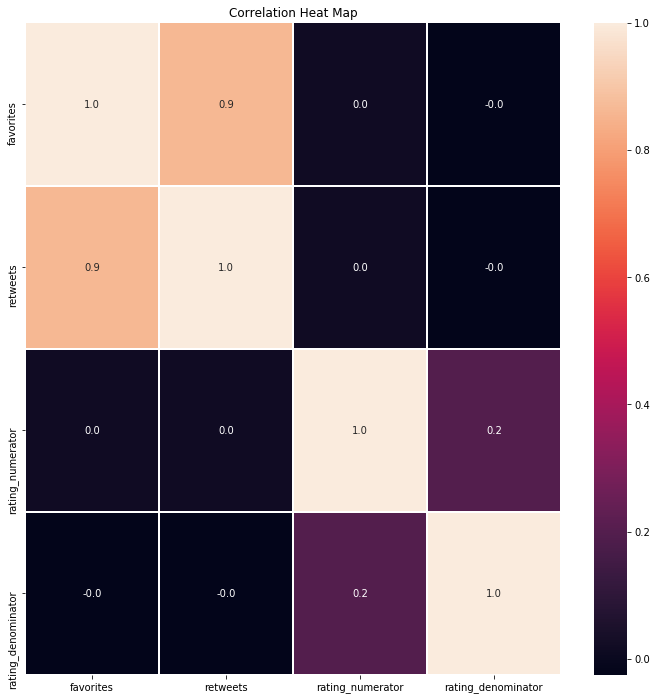

In [52]:
#correlation heat map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df[['source','favorites','retweets','rating_numerator','rating_denominator']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

#### Analysis

Strong correlation between favorites and retweets, this is as expected.

### Visualisation 2 - frequent top list for predicted dog breeds

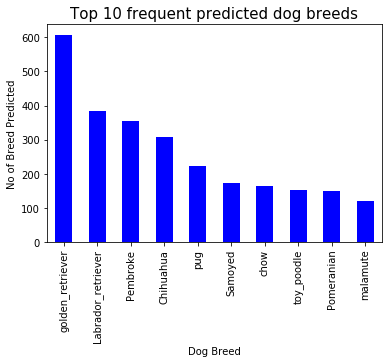

In [53]:
df['pred_breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color= 'blue')
plt.ylabel('No of Breed Predicted')
plt.title('Top 10 frequent predicted dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.plot();

#### Analysis

Golden_retriver seems to be the most frequent predicted list in top 10 with over 600 times predicted correctly 

### Visualisation 3:- Top 10 dog names 

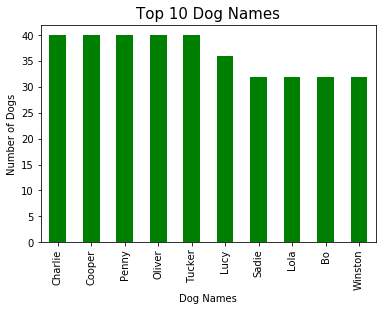

In [54]:
df['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color= 'green')
plt.ylabel('Number of Dogs')
plt.title('Top 10 Dog Names', size=15)
plt.xlabel('Dog Names')
plt.plot();

#### Analysis

Penny rocking the favourite top 10 dog names list and almost all top 5 names i.e. Penny, Oliver,Charlie, Tucker and Cooper are rulling top 10 dog names list